In [15]:
import pandas as pd
import numpy as np
import re
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer

In [9]:
resume_data = pd.read_csv("resume_data.csv",index_col=0)
resume_data

,Category,File_name,resume_text
0,AGRICULTURE,37201447.pdf,ADULT EDUCATION INSTRUCTOR\nSummary\nSeasoned ...
1,AGRICULTURE,12674256.pdf,FINANCIAL SALES CONSULTANT\nProfessional Summa...
2,AGRICULTURE,29968330.pdf,EXTENSION METHODOLOGIST\nProfile\nSelf-motivat...
3,ARTS,25157655.pdf,INSIDE ACCOUNT MANAGER\nSummary\nInside Accoun...
4,ARTS,12334650.pdf,FOOD SERVER\nSummary\nI have sixteen years of ...
5,ARTS,94230796.pdf,LIBRARY AIDE ( FULL-TIME)\nProfessional Summar...
6,SALES,23032182.pdf,SALES ASSOCIATE\nABIGAIL\n \nFULTON\nAccomplis...
7,SALES,24610685.pdf,SALES ENGINEER\nSummary\nI am currently lookin...
8,SALES,17781039.pdf,SALES\nProfessional Summary\nExperienced manag...
9,CONSULTANT,57364820.pdf,SR. CONSULTANT\nProfessional Summary\nA dedica...


In [10]:
nlp = spacy.load('en_core_web_sm')

stopwords = ENGLISH_STOP_WORDS
# lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    doc=nlp(doc)
    doc = " ".join([word.lemma_ for word in doc])
    
    return doc

In [11]:
resume_data['Cleaned_Resume']=resume_data['resume_text'].apply(lambda x:clean(x))

In [12]:
resume_data

,Category,File_name,resume_text,Cleaned_Resume
0,AGRICULTURE,37201447.pdf,ADULT EDUCATION INSTRUCTOR\nSummary\nSeasoned ...,adult education instructor summary season agri...
1,AGRICULTURE,12674256.pdf,FINANCIAL SALES CONSULTANT\nProfessional Summa...,financial sale consultant professional summary...
2,AGRICULTURE,29968330.pdf,EXTENSION METHODOLOGIST\nProfile\nSelf-motivat...,extension methodologist profile self motivate ...
3,ARTS,25157655.pdf,INSIDE ACCOUNT MANAGER\nSummary\nInside Accoun...,inside account manager summary inside account ...
4,ARTS,12334650.pdf,FOOD SERVER\nSummary\nI have sixteen years of ...,food server summary sixteen year experience cu...
5,ARTS,94230796.pdf,LIBRARY AIDE ( FULL-TIME)\nProfessional Summar...,aide time professional summary high school gra...
6,SALES,23032182.pdf,SALES ASSOCIATE\nABIGAIL\n \nFULTON\nAccomplis...,sale associate fulton accomplishment demonstra...
7,SALES,24610685.pdf,SALES ENGINEER\nSummary\nI am currently lookin...,sale engineer summary currently look advance c...
8,SALES,17781039.pdf,SALES\nProfessional Summary\nExperienced manag...,sale professional summary experienced manager ...
9,CONSULTANT,57364820.pdf,SR. CONSULTANT\nProfessional Summary\nA dedica...,consultant professional summary dedicate versa...


In [ ]:
def wordcloud(df):
    # txt = df#' '.join(txt for txt in df)
    txt = ' '.join(txt for txt in resume_data['Cleaned_Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000
    ).generate(txt)

    return wordcloud

In [18]:
categories = np.sort(resume_data['Category'].unique())
categories

df_categories = [resume_data[resume_data['Category'] == category].loc[:, ['Cleaned_Resume', 'Category']] for category in categories]

In [21]:
# df_categories[0]

,Cleaned_Resume,Category
0,adult education instructor summary season agri...,AGRICULTURE
1,financial sale consultant professional summary...,AGRICULTURE
2,extension methodologist profile self motivate ...,AGRICULTURE


In [45]:
nlp = spacy.load('en_core_web_sm')

doc = resume_data['Cleaned_Resume'][0]
print(len(doc))
document = nlp(doc)
text_no_namedentities = []

ents= [[e.text,e.label_] for e in document.ents]

# for item in document:
#     if item.text in ents:
#         pass
#     else:
#         text_no_namedentities.append(item.text)
# doc = (" ".join(text_no_namedentities))
# len(doc)
ents

4166


[['season', 'DATE'], ['educationâ', 'CARDINAL'], ['san diego city', 'GPE']]

In [5]:
chunksize = 1000
for chunk in pd.read_csv('archive/Resume/Resume.csv', chunksize=chunksize):
    df=chunk.head()
    break

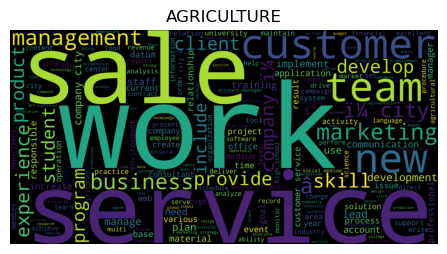

In [28]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories[:1]):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i+1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [37]:
def resume_cleaning(text):
    
    # Remove HTML tags 
    cleaned_text = re.sub(r'<.*?>', ' ', text)
    
    # Remove non-english characters, punctuation,special characters, digits, continous underscores and extra whitespace
    cleaned_text = re.sub('[^a-zA-Z]', ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]|_', ' ', cleaned_text)
    cleaned_text = re.sub(r'\d+', ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text=re.sub('http\S+\s', " ", cleaned_text)
    
    
    
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    
    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)
    
    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    cleaned_text = ' '.join(stemmed_words)
    
    return cleaned_text